Importar Librerías

In [ ]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Cargar conjunto de datos

In [ ]:
# Cargar el dataset de Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
# Cargue la divisidn de entrenamiento y prueba del conjunto de datos Fashion MNIST
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

Normalización datos

In [ ]:
# Normalizar los valores de pixeles del tren y probar las imagenes.
training_images = training_images / 255.0
test_images = test_images / 255.0

Construcción del modelo

In [ ]:
# Construir el modelo de clasificacion.
model = keras.models. Sequential ([
    # Agregar convoluciones y max pooling
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    # Agrega las mismas capas que antes.
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

Compilación del modelo

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Entrenamiento del modelo

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.3941 - accuracy: 0.8604
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2708 - accuracy: 0.9018
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2247 - accuracy: 0.9177
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1920 - accuracy: 0.9303
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1641 - accuracy: 0.9398
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1397 - accuracy: 0.9489
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1195 - accuracy: 0.9567
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1021 - accuracy: 0.9626
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0857 - accuracy: 0.9689
Epoch 10/10
1875/1875 [==============================] - 36s 19m

<Axes: >

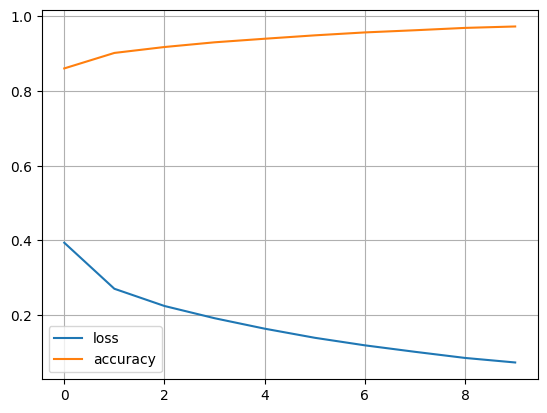

In [ ]:
# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)
# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)

Evaluación del modelo

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print ("Precisión en el conjunto de prueba:", accuracy)

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0749 - accuracy: 0.9727
Pérdida en el conjunto de entrenamiento: 0.07490143924951553
Precisión en el conjunto de entrenamiento: 0.9727166891098022
313/313 [==============================] - 2s 5ms/step - loss: 0.3233 - accuracy: 0.9109
Pérdida en el conjunto de prueba: 0.32326748967170715
Precisión en el conjunto de prueba: 0.9108999967575073


Predicción

In [ ]:
#predict

index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

Label: 2
1/1 [==============================] - 0s 95ms/step
Classification:
 [[3.6215153e-10]
 [3.4109088e-14]
 [1.0000000e+00]
 [5.0298760e-10]
 [1.4444876e-10]
 [3.0010199e-17]
 [4.7293458e-12]
 [1.0567932e-18]
 [1.5161887e-13]
 [8.7419856e-21]]


Preparación de datos

In [ ]:
print(test_labels[:30])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]


Selección Imágenes de Interes

In [ ]:
FIRST_IMAGE=8
SECOND_IMAGE=5
THIRD_IMAGE=14
print(test_labels[FIRST_IMAGE])
print(test_labels[SECOND_IMAGE])
print(test_labels[ THIRD_IMAGE])

5
1
4


Visualización de Imágenes

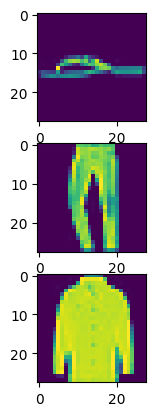

In [ ]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

Extracción de activaciones

In [ ]:
layer = 0
filter1 = 0
filter2 = 10
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

Visualización de Convoluciones

1/1 [==============================] - 0s 22ms/step


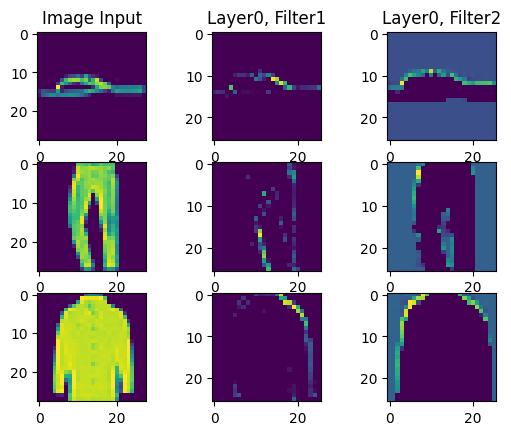

In [ ]:
f, axarr = plt.subplots(3,3)
axarr[0, 0].set_title("Image Input")
axarr[0,0]. imshow(test_images[FIRST_IMAGE])

f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[0, 1].set_title("Layer"+ str(layer) +", Filter1")
axarr[0,1].imshow(f1[0, : , :, filter1])
axarr[0,2].set_title("Layer"+ str(layer) +", Filter2")
axarr[0,2].imshow(f1[0, : , :, filter2])
axarr[1,0].imshow(test_images[SECOND_IMAGE])

f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[1,1].imshow(f2[0, : , :, filter1])
axarr[1,2]. imshow(f2[0, : , :, filter2])
axarr[2,0].imshow(test_images[THIRD_IMAGE])

f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[2,1].imshow(f3[0, : , :, filter1])
axarr[2,2].imshow(f3[0, : , :, filter2])

Selección Imágenes de Interés

In [ ]:
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=18
print(test_labels[FIRST_IMAGE])
print(test_labels[SECOND_IMAGE])
print(test_labels[ THIRD_IMAGE])

9
6
8


Visualización de Imágenes

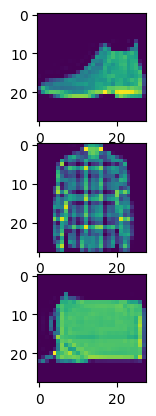

In [ ]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

Extracción de activaciones

In [ ]:
layer = 0
filter1 = 0
filter2 = 10
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

Visualización Convoluciones

1/1 [==============================] - 0s 151ms/step


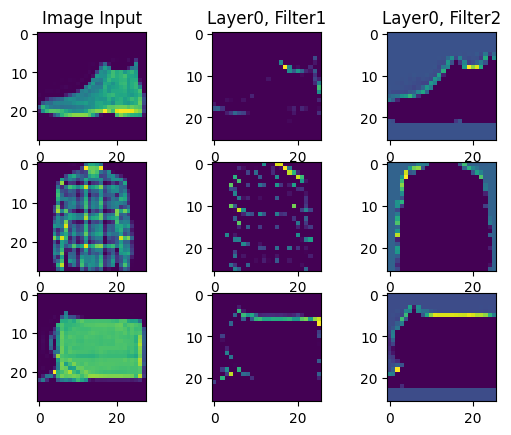

In [ ]:
f, axarr = plt.subplots(3,3)
axarr[0, 0].set_title("Image Input")
axarr[0,0]. imshow(test_images[FIRST_IMAGE])

f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[0, 1].set_title("Layer"+ str(layer) +", Filter1")
axarr[0,1].imshow(f1[0, : , :, filter1])
axarr[0,2].set_title("Layer"+ str(layer) +", Filter2")
axarr[0,2].imshow(f1[0, : , :, filter2])
axarr[1,0].imshow(test_images[SECOND_IMAGE])

f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[1,1].imshow(f2[0, : , :, filter1])
axarr[1,2]. imshow(f2[0, : , :, filter2])
axarr[2,0].imshow(test_images[THIRD_IMAGE])

f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[2,1].imshow(f3[0, : , :, filter1])
axarr[2,2].imshow(f3[0, : , :, filter2])